In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
import numpy as np
from glob import glob
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

In [ ]:
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/Monioc_Disease_dataset'

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=344,
    validation_split=0.2,
    subset='validation'
)

Found 1585 files belonging to 4 classes.
Using 1268 files for training.
Found 1585 files belonging to 4 classes.
Using 317 files for validation.


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top= False)

vgg.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = vgg(image_batch)
print(feature_batch.shape)

(32, 7, 7, 512)


In [ ]:
folders = glob('/content/drive/MyDrive/Monioc_Disease_dataset/*')
print(len(folders))

4


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer = 'adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=20
)

Epoch 1/20
40/40 [==============================] - 404s 10s/step - loss: 6.7401 - accuracy: 0.7050 - val_loss: 2.7045 - val_accuracy: 0.8517
Epoch 2/20
40/40 [==============================] - 98s 2s/step - loss: 1.9222 - accuracy: 0.9109 - val_loss: 1.7084 - val_accuracy: 0.9369
Epoch 3/20
40/40 [==============================] - 100s 2s/step - loss: 0.9143 - accuracy: 0.9598 - val_loss: 1.3060 - val_accuracy: 0.9401
Epoch 4/20
40/40 [==============================] - 101s 2s/step - loss: 1.1890 - accuracy: 0.9621 - val_loss: 2.2173 - val_accuracy: 0.9148
Epoch 5/20
40/40 [==============================] - 117s 3s/step - loss: 1.0966 - accuracy: 0.9606 - val_loss: 1.6966 - val_accuracy: 0.9401
Epoch 6/20
40/40 [==============================] - 111s 2s/step - loss: 1.2223 - accuracy: 0.9756 - val_loss: 1.5592 - val_accuracy: 0.9243
Epoch 7/20
40/40 [==============================] - 89s 2s/step - loss: 1.6180 - accuracy: 0.9629 - val_loss: 2.4089 - val_accuracy: 0.9369
Epoch 8/20
40/

In [ ]:
model.save('/content/drive/MyDrive/Disease_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


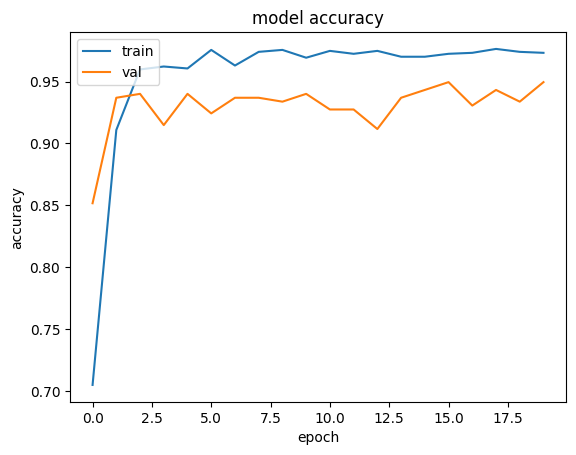

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictive_model = tf.keras.models.load_model('/content/drive/MyDrive/Disease_Model.h5')

In [ ]:
model.evaluate(test_dataset)

10/10 [==============================] - 23s 278ms/step - loss: 2.6593 - accuracy: 0.9495


[2.659292221069336, 0.9495267868041992]